# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df=pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

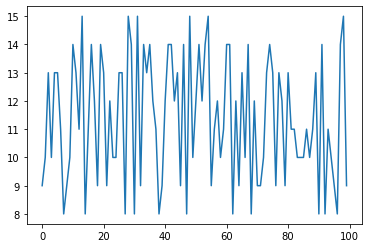

In [7]:
df.國文.plot()


當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

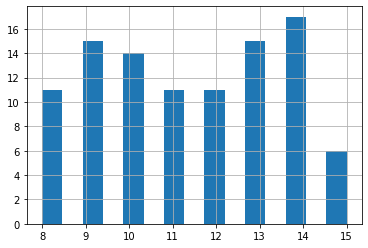

In [8]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [9]:
Average=df["國文"].mean()
Average

11.39

算標準差。

In [10]:
Average=df["國文"].std()
Average

2.1968526614594834

不如就該算的都幫我們算算...

In [11]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [12]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [13]:
df["國文"].corr(df["數學"])

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [14]:
df["總級分"]=0
df["總級分"]=df.sum(axis=1)
df.head()

C:\Users\kiwi7\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [15]:
df['加權']=df['國文']+df['英文']+df['數學']*2

In [16]:
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [17]:
df.sort_values("總級分",ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
64,俞志峰,9,14,13,14,15,65,49
83,李士賢,10,14,15,13,13,65,54
87,趙偉希,10,13,14,13,15,65,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [18]:
df.sort_values(by=["加權","總級分"],ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
44,童心怡,13,13,14,8,13,61,54
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
4,崔靜成,13,12,14,12,13,64,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】重設 index

In [19]:
df2=df.sort_values(by=["加權","總級分"],ascending=False).head(10).reset_index(drop=True)
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58
1,胡淳茜,12,15,14,13,11,65,55
2,詹威德,12,13,15,10,14,64,55
3,蔡亦瑄,13,13,14,13,12,65,54
4,李士賢,10,14,15,13,13,65,54
5,童心怡,13,13,14,8,13,61,54
6,曾怡君,11,12,15,13,14,65,53
7,陳怡婷,15,14,12,9,15,65,53
8,崔靜成,13,12,14,12,13,64,53
9,林哲法,14,9,15,10,14,62,53


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [20]:
df3=df2[df2['數學']==15]
df3

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58
2,詹威德,12,13,15,10,14,64,55
4,李士賢,10,14,15,13,13,65,54
6,曾怡君,11,12,15,13,14,65,53
9,林哲法,14,9,15,10,14,62,53


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [21]:
df3=df2[df2['數學'] & df2['英文']==15]
df3

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [22]:
df4=df2.drop("總級分",axis=1)
df4

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
5,童心怡,13,13,14,8,13,54
6,曾怡君,11,12,15,13,14,53
7,陳怡婷,15,14,12,9,15,53
8,崔靜成,13,12,14,12,13,53
9,林哲法,14,9,15,10,14,53


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [23]:
df2.drop("總級分",axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
5,童心怡,13,13,14,8,13,54
6,曾怡君,11,12,15,13,14,53
7,陳怡婷,15,14,12,9,15,53
8,崔靜成,13,12,14,12,13,53
9,林哲法,14,9,15,10,14,53


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [24]:
df2.drop(5)

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
4,李士賢,10,14,15,13,13,54
6,曾怡君,11,12,15,13,14,53
7,陳怡婷,15,14,12,9,15,53
8,崔靜成,13,12,14,12,13,53
9,林哲法,14,9,15,10,14,53


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [25]:
df2.drop(df2[df2["姓名"]=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
0,吳志遠,13,15,15,8,8,58
1,胡淳茜,12,15,14,13,11,55
2,詹威德,12,13,15,10,14,55
3,蔡亦瑄,13,13,14,13,12,54
5,童心怡,13,13,14,8,13,54
6,曾怡君,11,12,15,13,14,53
7,陳怡婷,15,14,12,9,15,53
8,崔靜成,13,12,14,12,13,53
9,林哲法,14,9,15,10,14,53


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [26]:
!pip install yfinance

In [27]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
aapl_df = yf.download('AAPL',start='2016-01-01',end='2021-11-19',progress=False)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-31,26.752501,26.757500,26.205000,26.315001,24.230717,163649200
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251434,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643713,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181009,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202669,324377600


In [28]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

#### 只要最後 300 個交易日!

In [29]:
aapl_df.tail(300)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-14,114.720001,115.930000,112.800003,115.360001,114.455719,140150100
2020-09-15,118.330002,118.830002,113.610001,115.540001,114.634315,184642000
2020-09-16,115.230003,116.000000,112.040001,112.129997,111.251038,154679000
2020-09-17,109.720001,112.199997,108.709999,110.339996,109.475067,178011000
2020-09-18,110.400002,110.879997,106.089996,106.839996,106.002502,287104900
...,...,...,...,...,...,...
2021-11-12,148.429993,150.399994,147.479996,149.990005,149.990005,63632600
2021-11-15,150.369995,151.880005,149.429993,150.000000,150.000000,59222800
2021-11-16,149.940002,151.490005,149.339996,151.000000,151.000000,59256200


#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

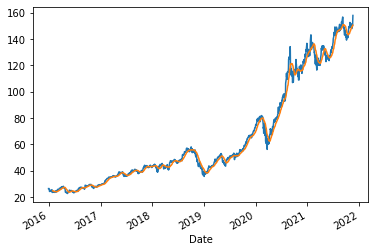

In [30]:
aapl_df.Close.plot()
aapl_df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

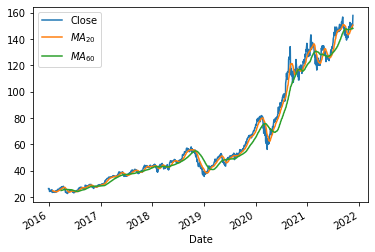

In [31]:
aapl_df.Close.plot(legend=True)
aapl_df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
aapl_df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [50]:
close300=aapl_df.tail(300)
close=close300.values
len(close)

300

In [51]:
x=close[:-1]
len(x)

299

In [52]:
y=close[1:]
len(y)

299

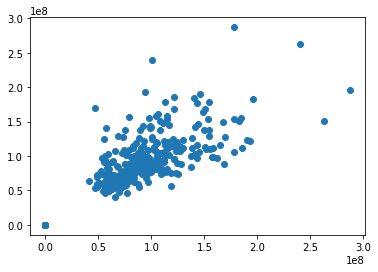

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [54]:
mydata = np.random.randn(4,3)

In [57]:
df2=pd.DataFrame(mydata,columns=list("ABC"))

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [58]:
df2

,A,B,C
0,-0.350176,1.343046,0.550120
1,0.323680,-0.908397,0.399997
2,-1.300619,0.459502,-0.886533
3,0.672478,1.096242,1.308204


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [96]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [97]:
df4=pd.concat([df2,df3],axis=0)

In [99]:
df4

,A,B,C
0,-0.350176,1.343046,0.550120
1,0.323680,-0.908397,0.399997
2,-1.300619,0.459502,-0.886533
3,0.672478,1.096242,1.308204
0,0.881754,-0.569458,-0.772225
1,0.616178,-1.845882,-0.995687
2,1.031378,-0.164872,-0.768689


前面我們弄得亂七八糟的 index 重設一下。

In [102]:
df4.index=range(df4.shape[0])
df4

,A,B,C
0,-0.350176,1.343046,0.550120
1,0.323680,-0.908397,0.399997
2,-1.300619,0.459502,-0.886533
3,0.672478,1.096242,1.308204
4,0.881754,-0.569458,-0.772225
5,0.616178,-1.845882,-0.995687
6,1.031378,-0.164872,-0.768689


#### 横向的貼

In [103]:
df5=pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [104]:
df5

,A,B,C,A,B,C
0,-0.350176,1.343046,0.550120,0.881754,-0.569458,-0.772225
1,0.323680,-0.908397,0.399997,0.616178,-1.845882,-0.995687
2,-1.300619,0.459502,-0.886533,1.031378,-0.164872,-0.768689
3,0.672478,1.096242,1.308204,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [107]:
df_names=pd.read_csv("data/names.csv",names=["姓名"])

In [108]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [109]:
df_grades = pd.DataFrame(np.random.randint(6,16,(df_names.shape[0],5)),
                        columns=['國文','英文','數學','社會','自然'])

In [110]:
df_grades

,國文,英文,數學,社會,自然
0,15,12,11,6,12
1,11,15,7,14,13
2,10,6,14,8,10
3,14,12,6,11,6
4,13,12,11,8,7
...,...,...,...,...,...
95,13,12,8,7,8
96,8,6,13,8,9
97,13,14,8,10,6
98,13,9,12,10,7


In [112]:
df_grades.to_csv("data/df2.csv",index=0)

In [113]:
df_score=pd.concat([df_names,df_grades],axis=1)

In [114]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,15,12,11,6,12
1,王紹尹,11,15,7,14,13
2,黃季坤,10,6,14,8,10
3,許正書,14,12,6,11,6
4,張鈞蓮,13,12,11,8,7
...,...,...,...,...,...,...
95,陳君生,13,12,8,7,8
96,曾桂甫,8,6,13,8,9
97,林欣怡,13,14,8,10,6
98,林佳霖,13,9,12,10,7
